In [1]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

import plotly.express as px

In [2]:
df_jan = pd.read_parquet('yellow_tripdata_2023-01.parquet')

In [3]:
df_feb = pd.read_parquet('yellow_tripdata_2023-02.parquet')

In [4]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [5]:
df_jan.shape

(3066766, 19)

In [6]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
df_jan['duration'] = df_jan.tpep_dropoff_datetime - df_jan.tpep_pickup_datetime

In [8]:
df_jan['duration'] = df_jan.duration.dt.total_seconds() / 60

In [9]:
df_jan['duration'].describe().to_frame()

,duration
count,3.066766e+06
mean,1.566900e+01
std,4.259435e+01
min,-2.920000e+01
25%,7.116667e+00
50%,1.151667e+01
75%,1.830000e+01
max,1.002918e+04


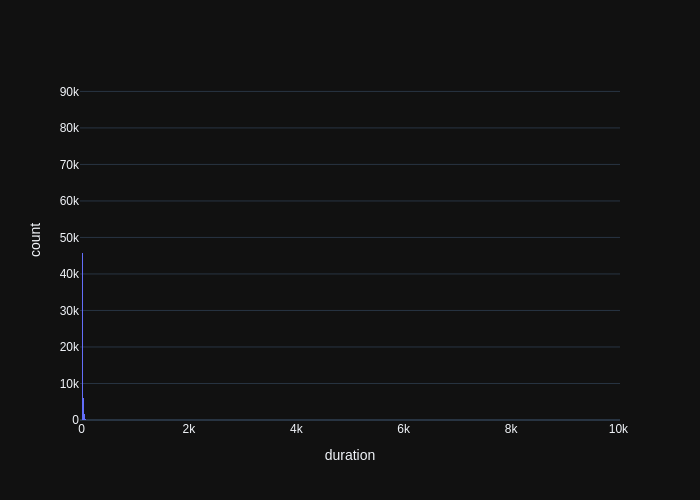

In [10]:
fig = px.histogram(df_jan, x='duration', template='plotly_dark')
fig.show('png')

In [11]:
df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]

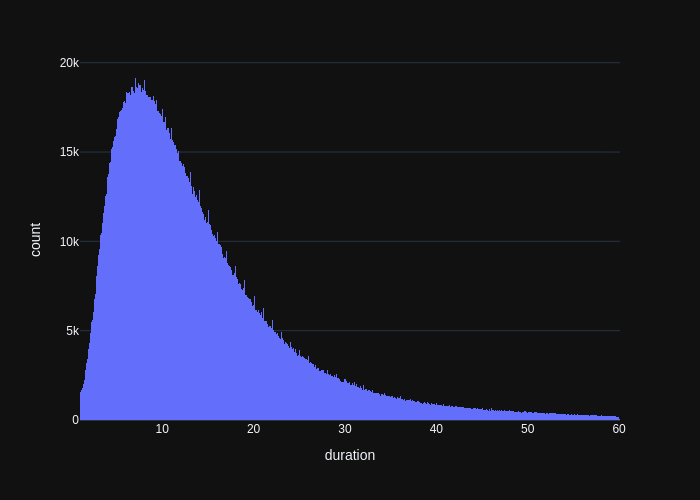

In [12]:
fig = px.histogram(df_jan, x='duration', template='plotly_dark')
fig.show('png')

In [13]:
categorical = ['PULocationID', 'DOLocationID']

In [14]:
df_jan.loc[:, categorical] = df_jan[categorical].astype(str)

/tmp/ipykernel_115405/2308668283.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['161' '43' '48' ... '114' '230' '262']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/tmp/ipykernel_115405/2308668283.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['141' '237' '238' ... '239' '79' '143']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [15]:
df_jan.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [16]:
train_dicts = df_jan[categorical].to_dict(orient='records')

In [17]:
dv = DictVectorizer()

In [18]:
X_train = dv.fit_transform(train_dicts)

In [19]:
X_train.shape

(3009173, 515)

In [20]:
target = 'duration'
y_train = df_jan[target].values

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_train)

In [23]:
root_mean_squared_error(y_train, y_pred)

7.649261934850555

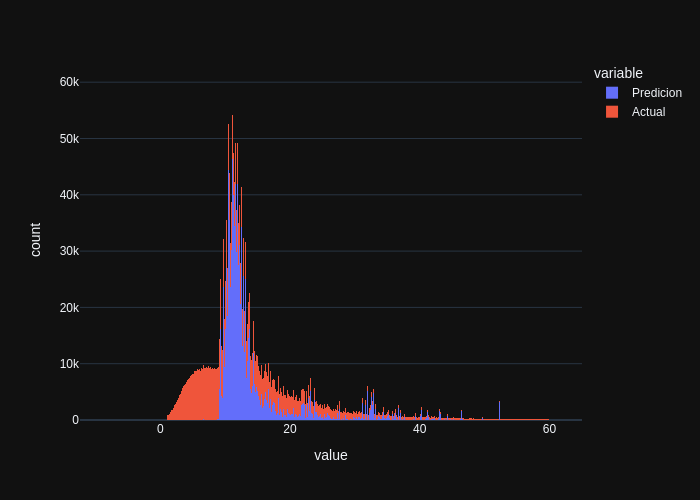

In [24]:
fig = px.histogram({'Predicion': y_pred, 'Actual': y_train}, template='plotly_dark')
fig.show('png')

In [34]:
df_feb['duration'] = df_feb.tpep_dropoff_datetime - df_feb.tpep_pickup_datetime

In [35]:
df_feb['duration'] = df_feb.duration.dt.total_seconds() / 60

In [36]:
df_feb = df_feb[(df_feb.duration >= 1) & (df_feb.duration <= 60)]

In [37]:
df_feb.loc[:, categorical] = df_feb[categorical].astype(str)

In [38]:
test_dicts = df_feb[categorical].to_dict(orient='records')

In [39]:
X_test = dv.transform(test_dicts)

In [40]:
y_test = df_feb[target].values

In [41]:
y_pred = lr.predict(X_test)

In [42]:
root_mean_squared_error(y_test, y_pred)

7.811817745843695

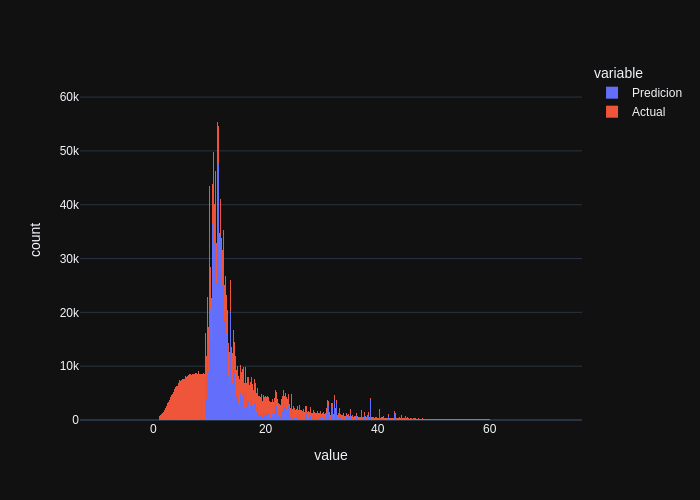

In [43]:
fig = px.histogram({'Predicion': y_pred, 'Actual': y_test}, template='plotly_dark')
fig.show('png')